In [80]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [54]:
# import dataset
diabetes = pd.read_csv('/content/drive/MyDrive/Projects/diabetes_prediction/diabetes_dataset.csv')

## Dataset Overview

### Basic Understanding

In [55]:
# inspect dataset
# diabetes.head()
diabetes.columns
# drop column 'Unnamed: 0'
diabetes = diabetes.drop('Unnamed: 0', axis=1)

In [56]:
# check available values for categorical variables
categorical_cols = ['Sex', 'Ethnicity', 'Smoking_Status', 'Physical_Activity_Level',
                    'Alcohol_Consumption', 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']

for col in categorical_cols:
    print(f"{col}: {diabetes[col].unique()}")

Sex: ['Female' 'Male']
Ethnicity: ['White' 'Asian' 'Black' 'Hispanic']
Smoking_Status: ['Never' 'Current' 'Former']
Physical_Activity_Level: ['Moderate' 'Low' 'High']
Alcohol_Consumption: ['Moderate' 'Heavy' nan]
Family_History_of_Diabetes: [0 1]
Previous_Gestational_Diabetes: [1 0]


To assist with the analysis, here are some explanation of each column:
- **Age**	Participant’s age (in years).
- **Sex**	Biological sex. Values: `Female`, `Male`.
- **Ethnicity**	Ethnic background or race of the participant. Values: `White`, `Asian`, `Black`, `Hispanic`.
- **BMI**	Body Mass Index – a measure of body fat based on height and weight.
- **Waist_Circumference**	Waist size (in cm or inches), used to assess central obesity.
- **Fasting_Blood_Glucose**	Blood sugar level after fasting (indicator of diabetes risk).
- **HbA1c**	Average blood sugar over ~3 months (glycated hemoglobin).
- **Blood_Pressure_Systolic**	Top number in BP – pressure during heartbeats.
- **Blood_Pressure_Diastolic**	Bottom number in BP – pressure between heartbeats.
- **Cholesterol_Total**	Total cholesterol level in the blood.
- **Cholesterol_HDL**	“Good” cholesterol – protects against heart disease.
- **Cholesterol_LDL**	“Bad” cholesterol – higher values increase heart risk.
- **GGT**	Liver enzyme (Gamma-glutamyl transferase) – marker for liver health.
- **Serum_Urate**	Uric acid level in blood – high levels can lead to gout.
- **Physical_Activity_Level**	How active the participant is. Values: `Low`, `Moderate`, `High`.
- **Dietary_Intake_Calories**	Daily calorie intake from food.
- **Alcohol_Consumption**	Amount/frequency of alcohol intake. Values: `Moderate`, `Heavy`, or missing (`NaN`).
- **Smoking_Status**	Whether the participant smokes. Values: `Never`, `Current`, `Former`.
- **Family_History_of_Diabetes**	Indicates if diabetes runs in the family. Values: `0` = No, `1` = Yes.
- **Previous_Gestational_Diabetes**	Whether participant had diabetes during pregnancy. Values: `0` = No, `1` = Yes.


In [57]:
diabetes.describe()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


### Distribution

In [58]:
# show distribution of numerical columns using histgram
# # List of numerical columns to plot
# numerical_cols = [
#     'Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
#     'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total',
#     'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories'
# ]
#
# # Set up the figure
# plt.figure(figsize=(20, 20))
#
# # Create a histogram for each numerical column
# for i, col in enumerate(numerical_cols):
#     plt.subplot(5, 3, i+1)  # 5 rows × 3 columns grid
#     plt.hist(diabetes[col].dropna(), bins=30, edgecolor='black')
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#
# plt.tight_layout()
# plt.show()

### Unit Conversion

In [59]:
# convert dataset unit to australian standard
diabetes['Fasting_Blood_Glucose_mmol_L'] = diabetes['Fasting_Blood_Glucose'] / 18
diabetes['Cholesterol_Total_mmol_L'] = diabetes['Cholesterol_Total'] / 38.67
diabetes['Cholesterol_HDL_mmol_L'] = diabetes['Cholesterol_HDL'] / 38.67
diabetes['Cholesterol_LDL_mmol_L'] = diabetes['Cholesterol_LDL'] / 38.67
diabetes['Serum_Urate_mmol_L'] = diabetes['Serum_Urate'] * 0.0595

In [60]:
# remove US unit corresponding column
diabetes = diabetes.drop(['Fasting_Blood_Glucose', 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'Serum_Urate'], axis=1)

### Healthy Range Reference

**Clinical Reference Ranges (in Australian Units)**

> **Note:** Dataset includes values in US units (mg/dL). Convert before comparison:
- **Glucose:** ÷ 18
- **Cholesterol:** ÷ 38.67
- **Serum Urate:** × 0.0595

---

- **Fasting_Blood_Glucose** *(after conversion)*  
  - Normal: **4.0 – 5.5 mmol/L**  
  - Prediabetes: 5.6 – 6.9 mmol/L  
  - Diabetes: ≥ 7.0 mmol/L  

- **HbA1c**  
  - Normal: **< 6.0%**  
  - Prediabetes: 6.0 – 6.4%  
  - Diabetes: ≥ 6.5%

- **Blood_Pressure_Systolic**  
  - Normal: **< 120 mmHg**  
  - Elevated: 120–139 mmHg  
  - Hypertension: ≥ 140 mmHg  

- **Blood_Pressure_Diastolic**  
  - Normal: **< 80 mmHg**  
  - Elevated: 80–89 mmHg  
  - Hypertension: ≥ 90 mmHg  

- **Cholesterol_Total** *(after conversion)*  
  - Desirable: **< 5.5 mmol/L**  

- **Cholesterol_HDL** *(after conversion)*  
  - Healthy: **> 1.0 mmol/L**  

- **Cholesterol_LDL** *(after conversion)*  
  - Optimal: **< 2.0 mmol/L**  

- **GGT (Gamma-glutamyl transferase)**  
  - Male: **5 – 50 U/L**  
  - Female: **5 – 35 U/L**

- **Serum_Urate** *(after conversion)*  
  - Male: **0.20 – 0.42 mmol/L**  
  - Female: **0.14 – 0.34 mmol/L**


In [61]:
# # boxplot generic
# plt.figure(figsize=(15, 10))
#
# for i, col in enumerate(numerical_cols):
#     plt.subplot(4, 4, i+1)
#     plt.boxplot(diabetes[col].dropna(), vert=False)
#     plt.title(f'{col} Boxplot')
#
# plt.tight_layout()
# plt.show()

<ipython-input-62-caf629bf929f>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


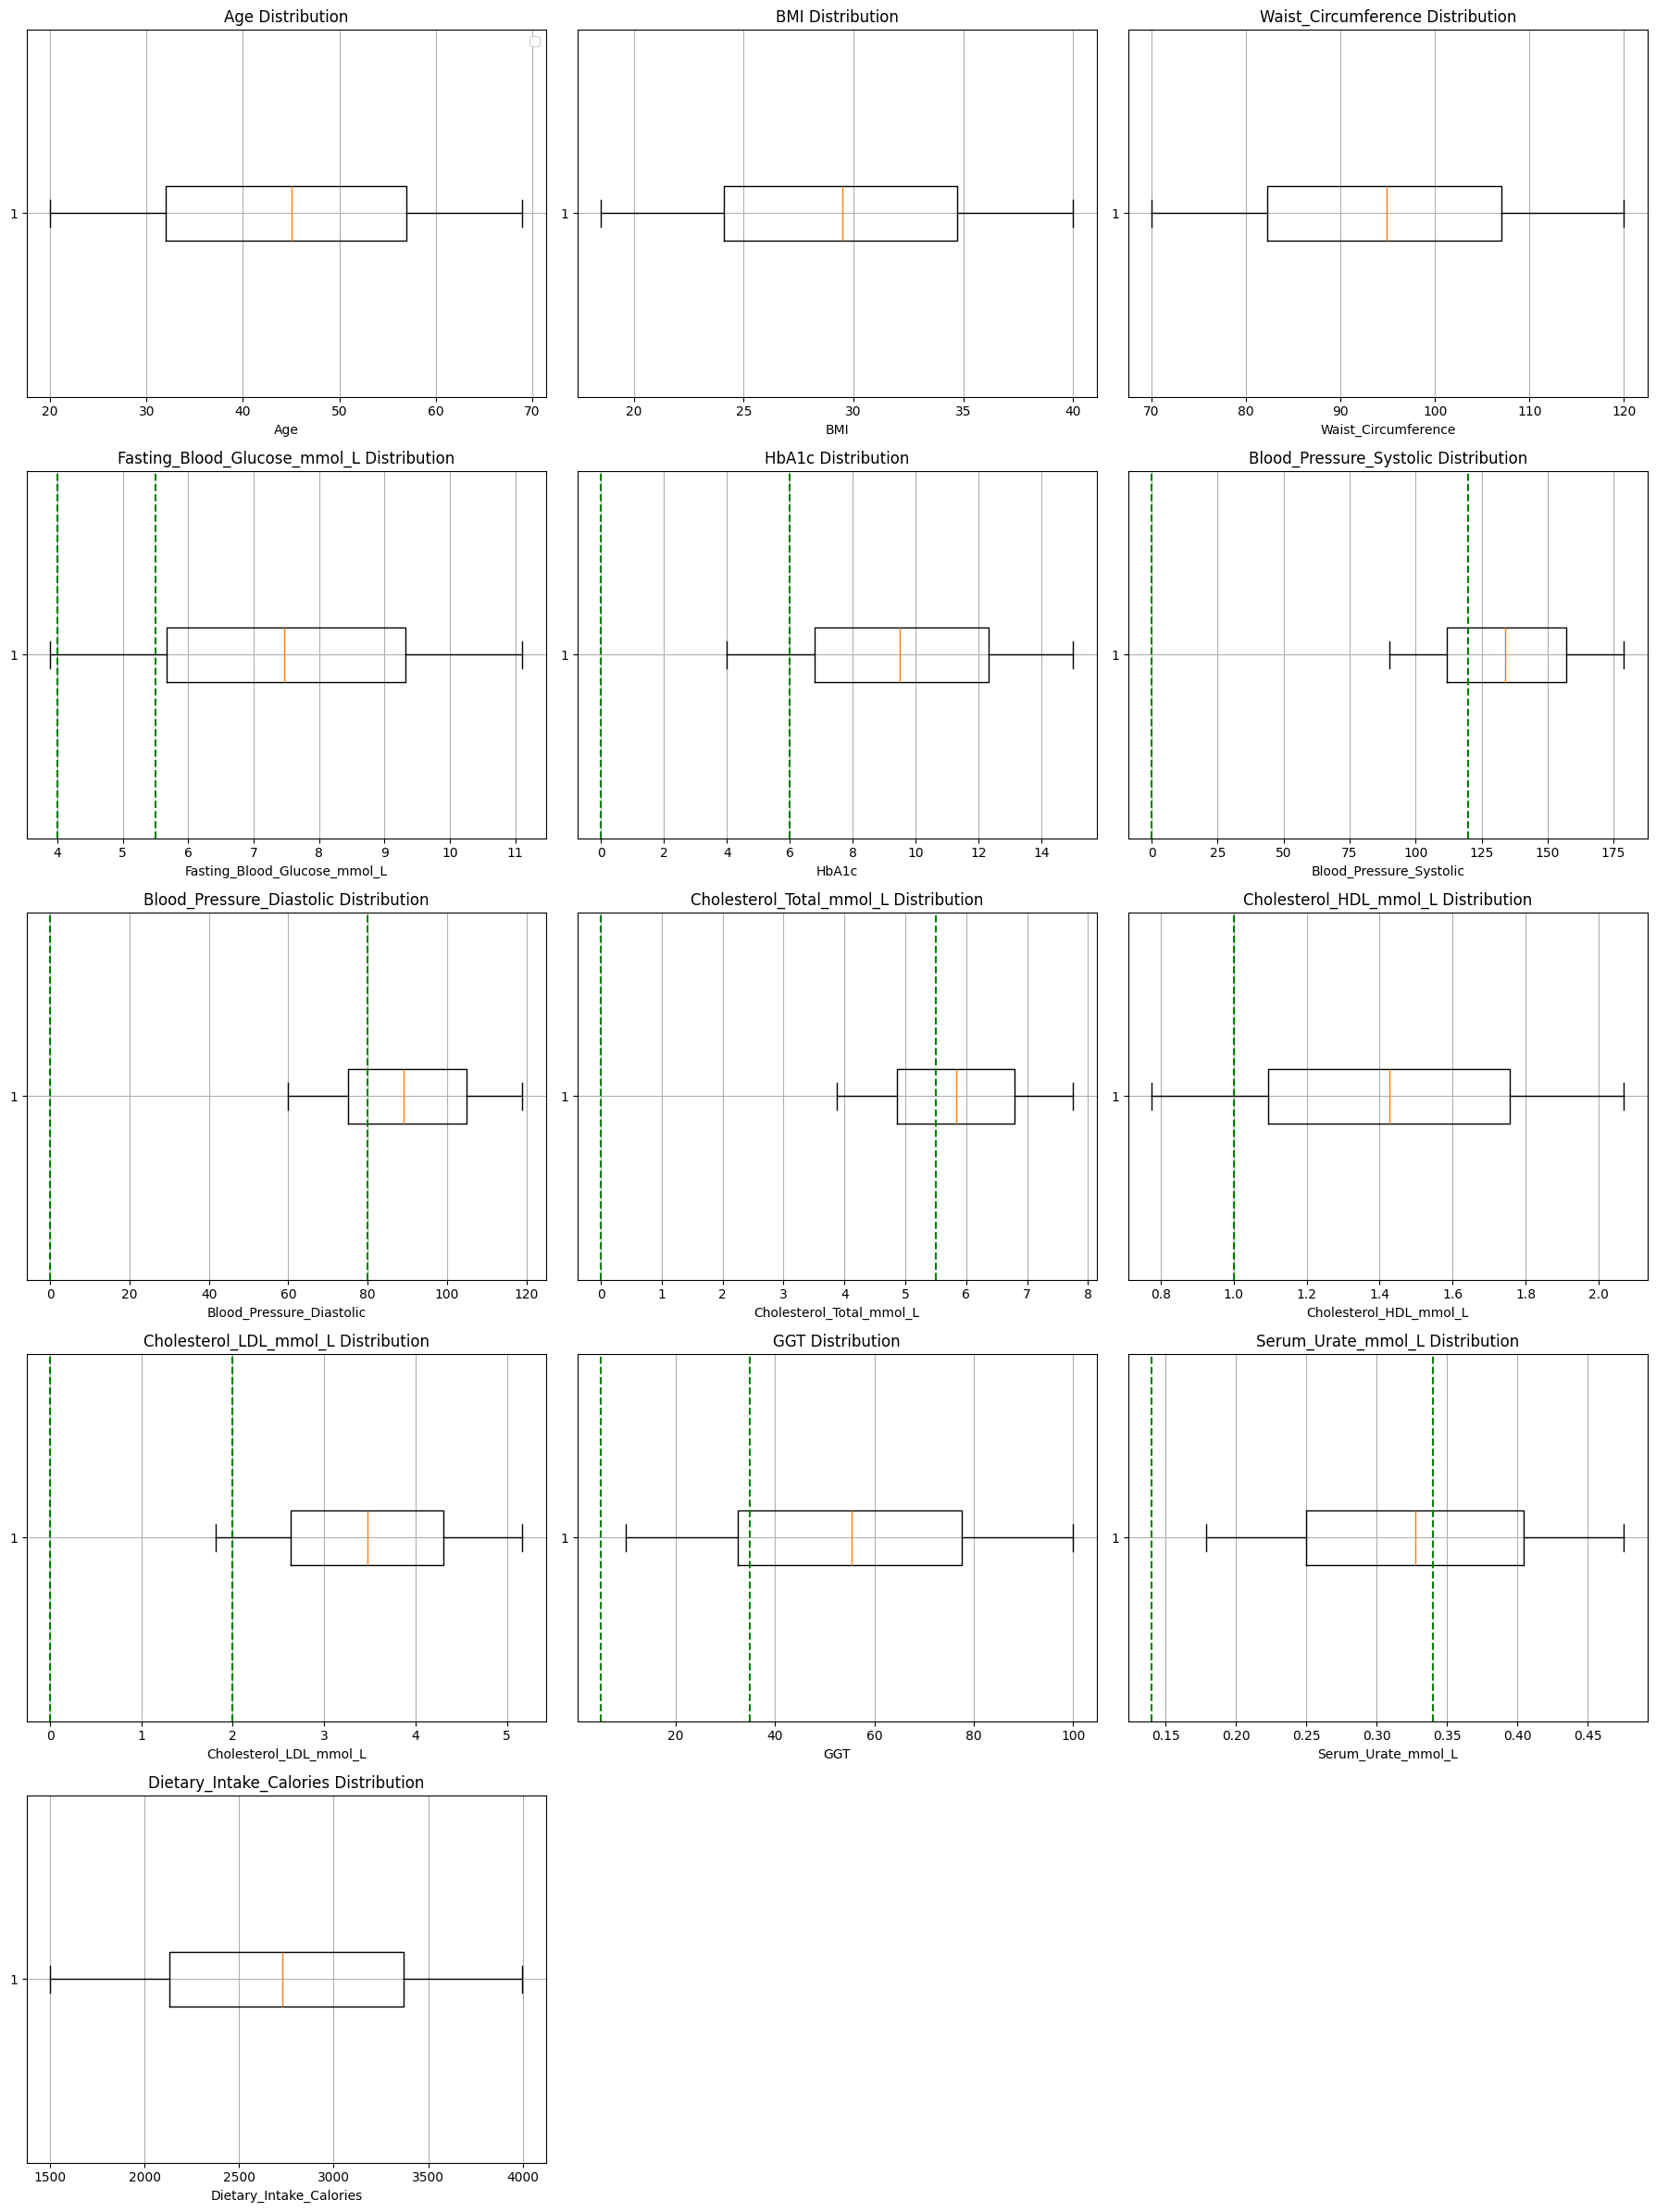

In [62]:
# boxplot with healthy range reference

# List of all numerical columns (converted where needed)
numerical_cols = [
    'Age', 'BMI', 'Waist_Circumference',
    'Fasting_Blood_Glucose_mmol_L', 'HbA1c',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
    'Cholesterol_Total_mmol_L', 'Cholesterol_HDL_mmol_L', 'Cholesterol_LDL_mmol_L',
    'GGT', 'Serum_Urate_mmol_L', 'Dietary_Intake_Calories'
]

# Healthy ranges (optional overlays)
healthy_ranges = {
    'Fasting_Blood_Glucose_mmol_L': (4.0, 5.5),
    'HbA1c': (0, 6.0),
    'Blood_Pressure_Systolic': (0, 120),
    'Blood_Pressure_Diastolic': (0, 80),
    'Cholesterol_Total_mmol_L': (0, 5.5),
    'Cholesterol_HDL_mmol_L': (1.0, float('inf')),
    'Cholesterol_LDL_mmol_L': (0, 2.0),
    'GGT': (5, 35),  # assume female reference
    'Serum_Urate_mmol_L': (0.14, 0.34)  # assume female reference
}

# Plot
plt.figure(figsize=(18, 24))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)
    data = diabetes[col].dropna()
    plt.boxplot(data, vert=False)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.grid(True)

    # Overlay healthy range if available
    if col in healthy_ranges:
        low, high = healthy_ranges[col]
        plt.axvline(low, color='green', linestyle='--', label='Healthy Range' if i == 0 else "")
        if high != float('inf'):
            plt.axvline(high, color='green', linestyle='--')

    if i == 0 and any(c in healthy_ranges for c in numerical_cols):
        plt.legend()

plt.tight_layout()
plt.show()

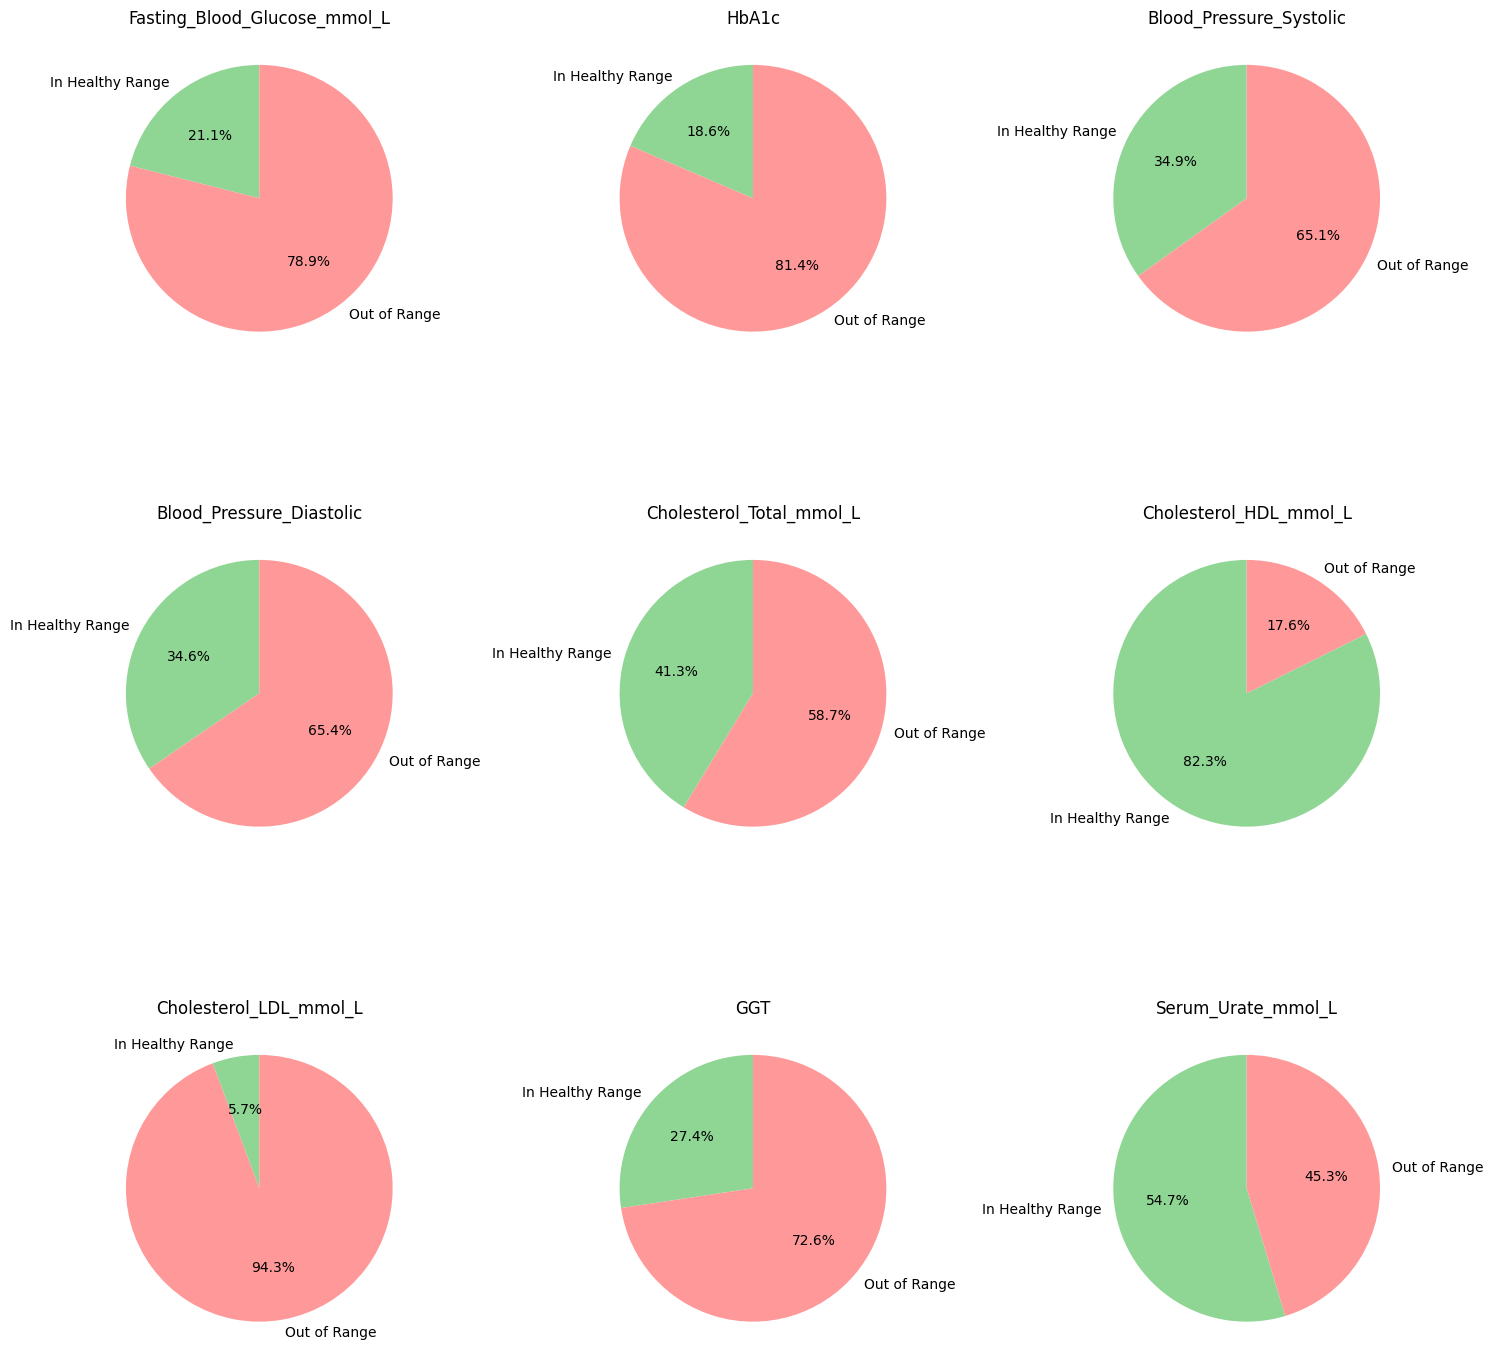

In [63]:
# percentage of records within healthy range for applicable numerical columns
# Set up plot layout
n = len(healthy_ranges)
cols = 3
rows = -(-n // cols)  # Ceiling division

plt.figure(figsize=(cols * 5, rows * 5))

# Loop through each variable
for i, (col, (low, high)) in enumerate(healthy_ranges.items()):
    series = diabetes[col].dropna()
    if low is not None and high != float('inf'):
        in_range = ((series >= low) & (series <= high)).sum()
    elif low is not None:
        in_range = (series >= low).sum()
    elif high is not None:
        in_range = (series <= high).sum()
    else:
        in_range = 0

    out_range = len(series) - in_range

    # Plot pie chart
    plt.subplot(rows, cols, i+1)
    plt.pie(
        [in_range, out_range],
        labels=['In Healthy Range', 'Out of Range'],
        autopct='%1.1f%%',
        colors=['#8fd694', '#ff9999'],
        startangle=90
    )
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

### App Relevance

- Using model to help user understand their diabetic risk level
- Indicate user's health vitals across all user (competition and community element)

## Label Engineering

### Has_Diabetes

A person is likely diabetic if one of the following condition is satisfied:

- Fasting_Blood_Glucose_mmol_L ≥ 7.0 mmol/L
- HbA1c ≥ 6.5%

In [64]:
# Binary target for diabetes based on standard thresholds
diabetes['Has_Diabetes'] = ((diabetes['Fasting_Blood_Glucose_mmol_L'] >= 7.0) |
                            (diabetes['HbA1c'] >= 6.5)).astype(int)

### Risk_Category

Use the following thresholds to define Low / Medium / High Risk:

- Low Risk: HbA1c < 5.7% and Fasting Glucose < 5.6

- Medium Risk: HbA1c between 5.7%–6.4% or Fasting Glucose between 5.6–6.9

- High Risk: HbA1c ≥ 6.5% or Fasting Glucose ≥ 7.0

In [65]:
def assign_risk(row):
    if row['HbA1c'] >= 6.5 or row['Fasting_Blood_Glucose_mmol_L'] >= 7.0:
        return 'High'
    elif 5.7 <= row['HbA1c'] < 6.5 or 5.6 <= row['Fasting_Blood_Glucose_mmol_L'] < 7.0:
        return 'Medium'
    else:
        return 'Low'

diabetes['Risk_Category'] = diabetes.apply(assign_risk, axis=1)

Aftering adding labels, we will check for class balance.

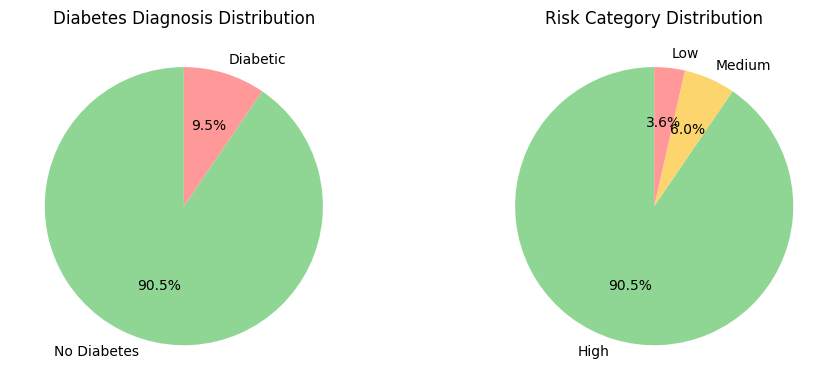

In [66]:
# Visualize class balance: Has_Diabetes (binary) and Risk_Category (multiclass)
plt.figure(figsize=(10, 4))

# Pie chart for Has_Diabetes
plt.subplot(1, 2, 1)
diabetes['Has_Diabetes'].value_counts().plot.pie(
    labels=['No Diabetes', 'Diabetic'],
    autopct='%1.1f%%',
    colors=['#8fd694', '#ff9999'],
    startangle=90
)
plt.title('Diabetes Diagnosis Distribution')
plt.ylabel('')

# Pie chart for Risk_Category
plt.subplot(1, 2, 2)
diabetes['Risk_Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#8fd694', '#fdd56f', '#ff9999'],
    startangle=90
)
plt.title('Risk Category Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Feature Engineering

### Understanding Features

#### Consider Diabetes vesus other underlying health conditions

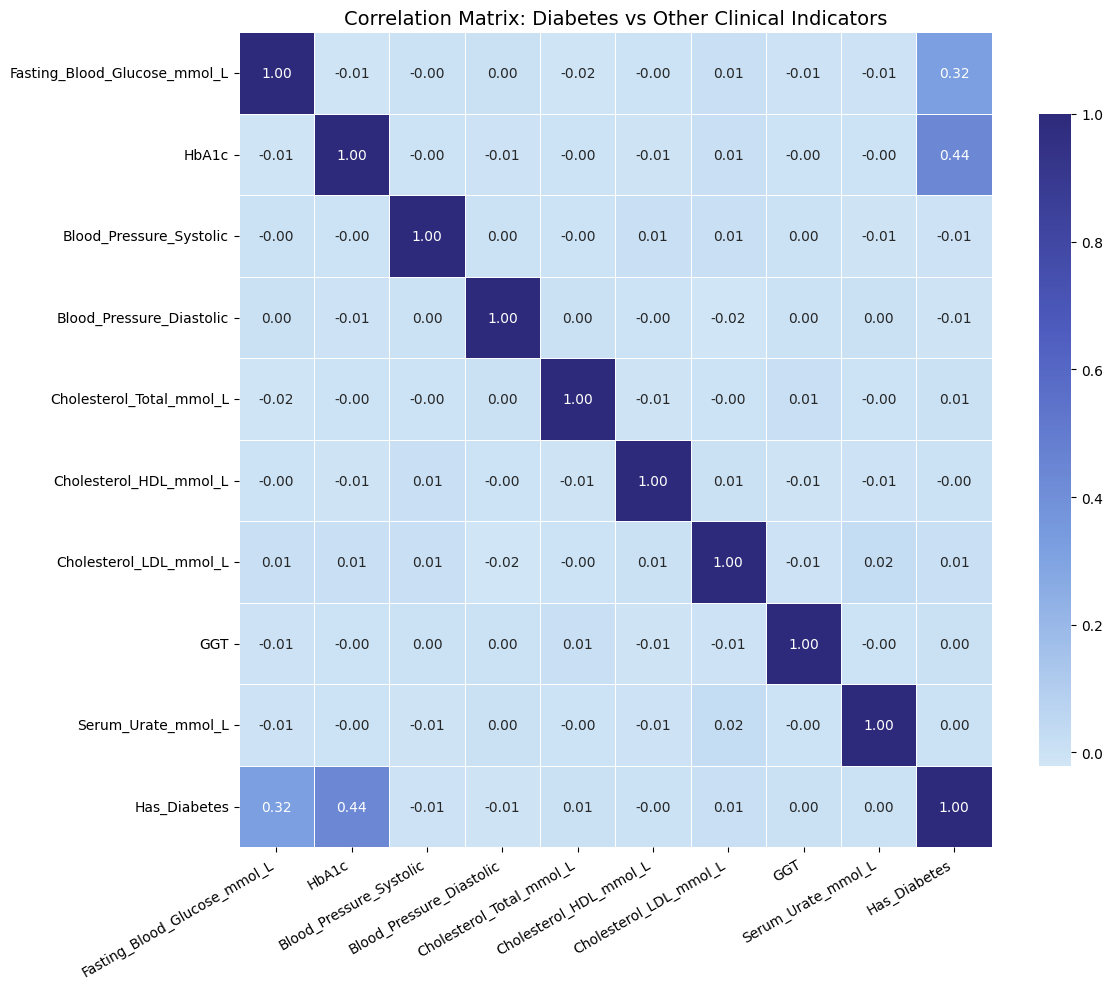

In [67]:
# Define groups for conditions
groupings = {
    'Diabetes Indicators': ['Fasting_Blood_Glucose_mmol_L', 'HbA1c'],
    'Hypertension': ['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic'],
    'Cholesterol': ['Cholesterol_Total_mmol_L', 'Cholesterol_HDL_mmol_L', 'Cholesterol_LDL_mmol_L'],
    'Liver Function': ['GGT'],
    'Uric Acid': ['Serum_Urate_mmol_L']
}

# Flatten all relevant columns into one list
all_relevant_cols = [col for group in groupings.values() for col in group]

# Include the diabetes labels for correlation reference
correlation_targets = ['Has_Diabetes']

# Compute correlation matrix for selected features and labels
correlation_df = diabetes[all_relevant_cols + correlation_targets].corr()

# Define a custom colormap from light blue to purple
colors = ["#d0e6f6", "#7b9fe0", "#4e5cbf", "#2e2a7b"]
custom_cmap = LinearSegmentedColormap.from_list("blue_purple", colors)

# Plot the heatmap using the custom color map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix: Diabetes vs Other Clinical Indicators", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Hba1c and fasting glucose has the highest correlation with the label "Has_Diabetes", which makes sense given their medical defination.

#### Consider correlation across all variables

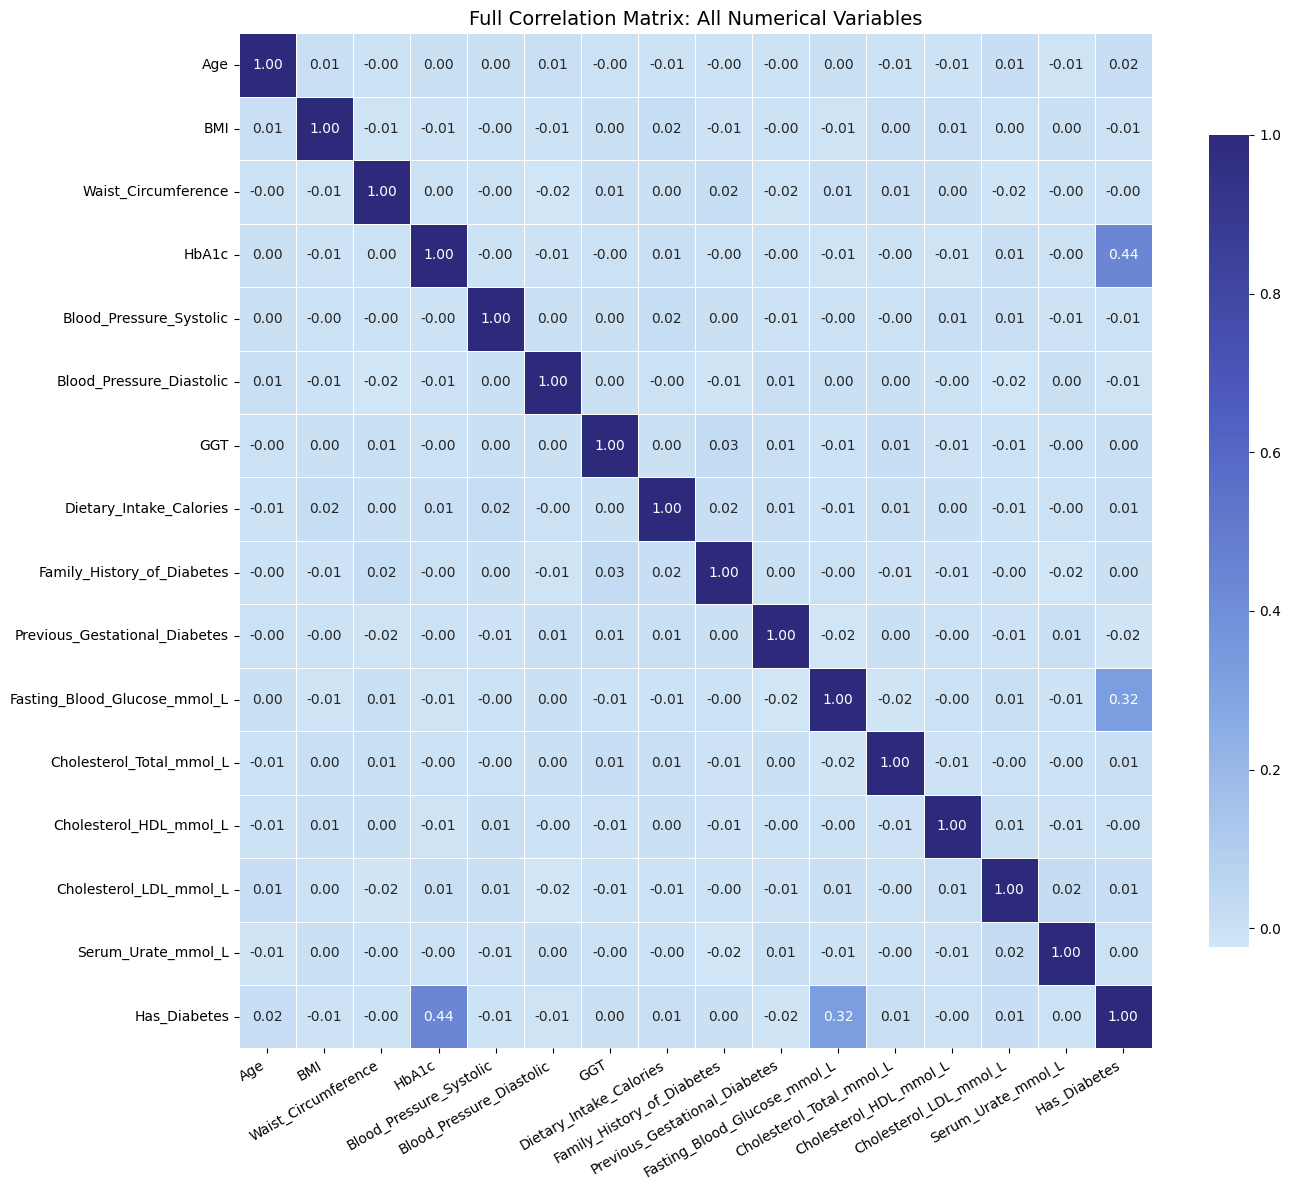

In [68]:
# Compute correlation matrix for all numerical columns
full_correlation_df = diabetes.corr(numeric_only=True)

# Plot the full correlation matrix with the same custom blue-purple color map
plt.figure(figsize=(14, 12))
sns.heatmap(full_correlation_df, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Full Correlation Matrix: All Numerical Variables", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Add Calculated Features

We added the calculated feature `Waist_to_BMI` as a proxy for body shape and central obesity.

In [69]:
# Calculate Waist-to-BMI ratio
diabetes['Waist_to_BMI'] = diabetes['Waist_Circumference'] / diabetes['BMI']

### Remove Unnecessary Features

For those who have done blood test, they won't need the model to tell them whether they have diabetes, thus we are removing the following columns from blood test results:

| Category            | Columns (AU Units)                                                  |
|---------------------|---------------------------------------------------------------------|
| **Diabetes markers** | `Fasting_Blood_Glucose_mmol_L`, `HbA1c`                            |
| **Cholesterol**      | `Cholesterol_Total_mmol_L`, `Cholesterol_HDL_mmol_L`, `Cholesterol_LDL_mmol_L` |
| **Liver Function**   | `GGT`                                                              |
| **Uric Acid**        | `Serum_Urate_mmol_L`                                               |


We will also remove Waist_Circumference and BMI because we added calculated feature Waist_to_BMI from them. This is to prevent multicollinearity across variables.

In [70]:
# Define columns to remove
columns_to_remove = [
    # Blood test columns
    'Fasting_Blood_Glucose_mmol_L', 'HbA1c',
    'Cholesterol_Total_mmol_L', 'Cholesterol_HDL_mmol_L', 'Cholesterol_LDL_mmol_L',
    'GGT', 'Serum_Urate_mmol_L',
    # Multicollinear with Waist_to_BMI
    'BMI', 'Waist_Circumference',
    # Remove Binary Label
    'Has_Diabetes'
]

# Drop the specified columns
diabetes = diabetes.drop(columns=columns_to_remove)

### Encoding Variables

#### Without binning

To prepare the dataset for classification, we perform the following feature transformation steps:

- **One-Hot Encoding**: Apply to nominal categorical variables (`Sex`, `Ethnicity`, `Physical_Activity_Level`, `Alcohol_Consumption`, `Smoking_Status`) to convert them into binary indicators.

- **Ordinal Encoding**: Apply to the target variable (`Risk_Category`), preserving the order of categories (`Low < Medium < High`).

In [71]:
# --- Approach 1: No Binning ---

# Copy original dataset for encoding
diabetes_encoded = diabetes.copy()

# Encode the target variable
risk_map = {'Low': 0, 'Medium': 1, 'High': 2}
diabetes_encoded['Risk_Category'] = diabetes_encoded['Risk_Category'].map(risk_map)

# Columns to one-hot encode (excluding target)
categorical_features = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']

# Apply one-hot encoding using pandas
diabetes_encoded = pd.get_dummies(diabetes_encoded, columns=categorical_features, drop_first=True)

#### With binning

To prepare the dataset for classification, we perform the following feature transformation steps:

- **Binning**: Convert selected continuous numerical columns (`Age`, `Blood_Pressure_Systolic`, `Blood_Pressure_Diastolic`, `Dietary_Intake_Calories`, `Waist_to_BMI`) into categorical brackets for improved interpretability and to capture non-linear effects.

- **One-Hot Encoding**: Apply to nominal categorical variables (`Sex`, `Ethnicity`, `Physical_Activity_Level`, `Alcohol_Consumption`, `Smoking_Status`) to convert them into binary indicators.

- **Ordinal Encoding**: Apply to the target variable (`Risk_Category`), preserving the order of categories (`Low < Medium < High`).


## Modelling

### Split train test set

In [73]:
# Features and target
X = diabetes_encoded.drop(columns=['Risk_Category'], errors='ignore')
y = diabetes_encoded['Risk_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Basic Model

#### Random Forest

🔍 Random Forest - Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        71
      Medium       0.00      0.00      0.00       120
        High       0.90      1.00      0.95      1809

    accuracy                           0.90      2000
   macro avg       0.30      0.33      0.32      2000
weighted avg       0.82      0.90      0.86      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


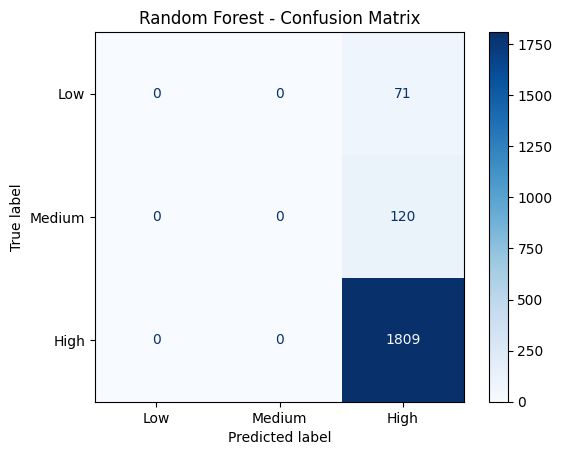

In [74]:
# --- 1. Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("🔍 Random Forest - Classification Report:")
print(classification_report(y_test, rf_preds, target_names=['Low', 'Medium', 'High']))

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=['Low', 'Medium', 'High'], cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

#### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

🔍 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        71
      Medium       0.00      0.00      0.00       120
        High       0.90      1.00      0.95      1809

    accuracy                           0.90      2000
   macro avg       0.30      0.33      0.32      2000
weighted avg       0.82      0.90      0.86      2000



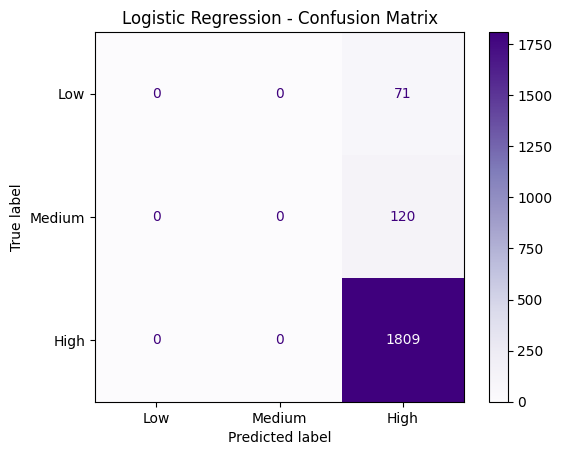

In [75]:
# --- 2. Logistic Regression ---
# For multiclass, use solver that supports it (e.g., 'lbfgs') and set multi_class='multinomial'
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("🔍 Logistic Regression - Classification Report:")
print(classification_report(y_test, log_preds, target_names=['Low', 'Medium', 'High']))

ConfusionMatrixDisplay.from_predictions(y_test, log_preds, display_labels=['Low', 'Medium', 'High'], cmap='Purples')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Address imbalanced class by setting class weight

Out of the two models, logistic regression with consideration for imbalanced classes are slightly better based on the f1 score, but still not ideal.

#### Random Forest

📊 Random Forest (class_weight='balanced'):
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        71
      Medium       0.00      0.00      0.00       120
        High       0.90      1.00      0.95      1809

    accuracy                           0.90      2000
   macro avg       0.30      0.33      0.32      2000
weighted avg       0.82      0.90      0.86      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


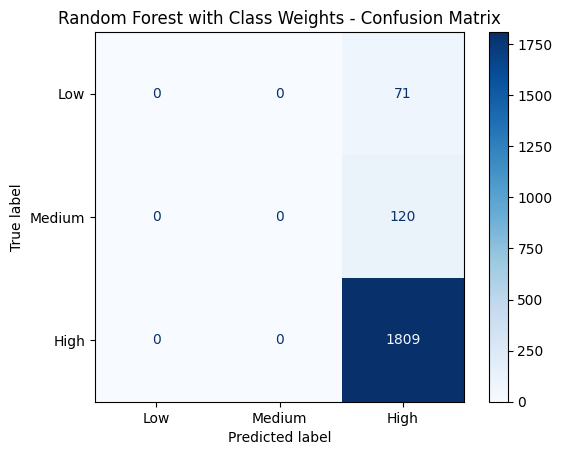

In [78]:
# Re-train Random Forest with class weights
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)
rf_weighted_preds = rf_weighted.predict(X_test)

print("📊 Random Forest (class_weight='balanced'):")
print(classification_report(y_test, rf_weighted_preds, target_names=['Low', 'Medium', 'High']))

ConfusionMatrixDisplay.from_predictions(y_test, rf_weighted_preds, display_labels=['Low', 'Medium', 'High'], cmap='Blues')
plt.title("Random Forest with Class Weights - Confusion Matrix")
plt.show()

#### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression (class_weight='balanced'):
              precision    recall  f1-score   support

         Low       0.04      0.44      0.07        71
      Medium       0.06      0.33      0.10       120
        High       0.90      0.29      0.44      1809

    accuracy                           0.30      2000
   macro avg       0.33      0.35      0.21      2000
weighted avg       0.82      0.30      0.41      2000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


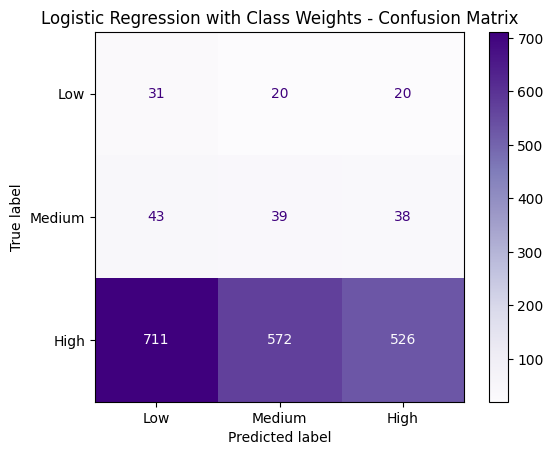

In [77]:
# Re-train Logistic Regression with class weights
log_weighted = LogisticRegression(class_weight='balanced', solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
log_weighted.fit(X_train, y_train)
log_weighted_preds = log_weighted.predict(X_test)

print("📊 Logistic Regression (class_weight='balanced'):")
print(classification_report(y_test, log_weighted_preds, target_names=['Low', 'Medium', 'High']))

ConfusionMatrixDisplay.from_predictions(y_test, log_weighted_preds, display_labels=['Low', 'Medium', 'High'], cmap='Purples')
plt.title("Logistic Regression with Class Weights - Confusion Matrix")
plt.show()

### Addressing imbalanced class using SMOTE

SMOTE combined with cross validation did not improve the issues with imbalanced class.

Models still default to predicting High, likely due to:
- Insufficient informative features for Low/Medium
- Feature overlap among classes
- Possibly not enough real-world signal to differentiate risk levels without blood markers

In [81]:
# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Random Forest

📊 Random Forest (SMOTE):
              precision    recall  f1-score   support

         Low       0.06      0.03      0.04        71
      Medium       0.08      0.04      0.05       120
        High       0.91      0.95      0.93      1809

    accuracy                           0.86      2000
   macro avg       0.35      0.34      0.34      2000
weighted avg       0.83      0.86      0.84      2000



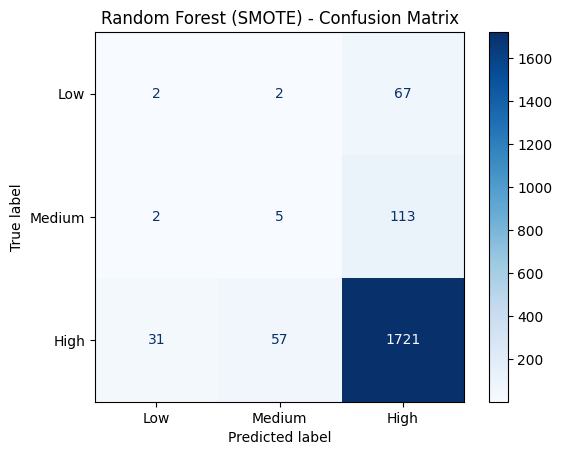

Random Forest (SMOTE) - 5-fold Macro F1: 0.946 ± 0.045


In [82]:
# --- 1. Random Forest on SMOTE ---
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
rf_preds = rf_smote.predict(X_test)

print("📊 Random Forest (SMOTE):")
print(classification_report(y_test, rf_preds, target_names=['Low', 'Medium', 'High']))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=['Low', 'Medium', 'High'], cmap='Blues')
plt.title("Random Forest (SMOTE) - Confusion Matrix")
plt.show()

# Cross-validation scores
cv_rf = cross_val_score(rf_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')
print(f"Random Forest (SMOTE) - 5-fold Macro F1: {cv_rf.mean():.3f} ± {cv_rf.std():.3f}")

#### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Logistic Regression (SMOTE):
              precision    recall  f1-score   support

         Low       0.05      0.17      0.08        71
      Medium       0.08      0.15      0.11       120
        High       0.91      0.77      0.83      1809

    accuracy                           0.71      2000
   macro avg       0.35      0.36      0.34      2000
weighted avg       0.83      0.71      0.76      2000



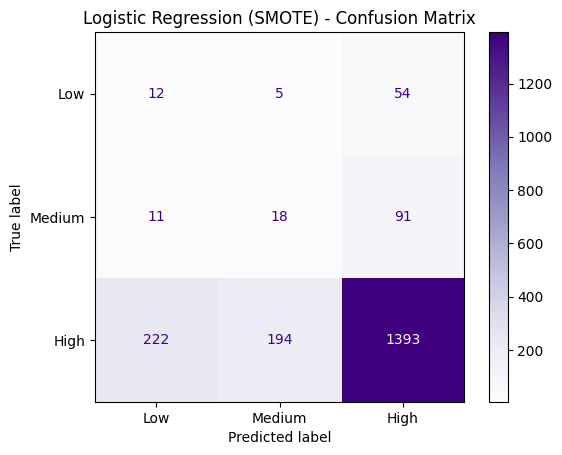

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Logistic Regression (SMOTE) - 5-fold Macro F1: 0.566 ± 0.028


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# # --- 2. Logistic Regression on SMOTE ---
# # --> Problem running code
# log_smote = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
# log_smote.fit(X_train_smote, y_train_smote)
# log_preds = log_smote.predict(X_test)
#
# print("📊 Logistic Regression (SMOTE):")
# print(classification_report(y_test, log_preds, target_names=['Low', 'Medium', 'High']))
# ConfusionMatrixDisplay.from_predictions(y_test, log_preds, display_labels=['Low', 'Medium', 'High'], cmap='Purples')
# plt.title("Logistic Regression (SMOTE) - Confusion Matrix")
# plt.show()
#
# # Cross-validation scores
# cv_log = cross_val_score(log_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')
# print(f"Logistic Regression (SMOTE) - 5-fold Macro F1: {cv_log.mean():.3f} ± {cv_log.std():.3f}")

## Summary

Despite trying various techniques to handle class imbalance and overfitting (including `class_weight='balanced'`, SMOTE), our classification models consistently struggled to predict minority classes (`Low` and `Medium` risk) fairly.

| Model                | Imbalance Strategy   | Notes |
|---------------------|----------------------|-------|
| Random Forest        | None                 | Severe overfitting to majority (`High`) class |
| Logistic Regression  | None                 | Slightly better generalization, still biased |
| Random Forest        | Class weights        | Helped `Medium`, not `Low`; `High` still dominates |
| Logistic Regression  | Class weights        | Most balanced result so far, still weak `Low` recall |
| Random Forest        | SMOTE                | Overfitted synthetic data, minority recall poor |
| Logistic Regression  | SMOTE                | Slight recall gain, but general performance dropped |


The models are limited by poor feature signal and heavy class imbalance. No technique can fairly predict the minority risk categories when the underlying data lacks strong, separable patterns. This highlights the importance of balanced, high-quality data and meaningful features — especially when building clinical risk prediction tools.
